In [1]:
#clean the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cust_data = pd.read_csv('customers.csv')
geo_data =  pd.read_csv('geolocation.csv')
order_items =  pd.read_csv('order_items.csv')
order_payments =  pd.read_csv('order_payments.csv')
order_reviews =  pd.read_csv('order_reviews.csv')
order_data =  pd.read_csv('orders.csv')
products_data = pd.read_csv('products.csv')
sellers_data = pd.read_csv('sellers.csv')
product_category = pd.read_csv('category_name.csv')
cd = pd.read_csv('closed_deals.csv')
mql=pd.read_csv('marketing_qualified.csv')

In [3]:
cust_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
cust_data.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
#checking if any null/NA present in any entry
order_items.isnull().any().any()

False

In [8]:
print('Number of sellers :',order_items.seller_id.unique().shape[0])
print('Number of unique products are : ',order_items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


In [9]:
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [10]:
order_payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:

order_payments.isnull().any().any()

False

In [12]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:

order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
products_data.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

In [18]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [19]:
print('Number of unique sellers are: ',sellers_data.seller_id.unique().shape[0])

Number of unique sellers are:  3095


In [20]:
#renaming all the zip_code_prefix so as to make the name common in all tables inorder to perform join

geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [21]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

In [22]:
#merging all customer related data

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(104485, 26)

In [23]:


B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [24]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(116581, 48)

In [25]:
#final data columns
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

In [26]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
zip_code_prefix_x                     0
customer_city                         0
customer_state                        0
geolocation_lat_x                   311
geolocation_lng_x                   311
geolocation_city_x                  311


In [27]:
print(data.shape[0])
data[data['order_status'] != 'delivered'].shape[0]

116581


2514

In [125]:
100 - round((2514/112863)*100,3)

97.773

# first customer state

In [127]:
data.customer_state.value_counts()

SP    49133
RJ    15185
MG    13530
RS     6436
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
PE     1878
CE     1538
MT     1116
PA     1103
MS      847
MA      838
PB      630
PI      567
RN      565
AL      458
SE      395
TO      334
RO      280
AM      170
AC       93
AP       84
RR       50
Name: customer_state, dtype: int64

In [128]:
pd.DataFrame(data.groupby(data.customer_state).mean()).sort_values(by='review_score',ascending=False)

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
customer_state,,,,,,,,,,,,,,,,,,,,
AP,4.226190,1.023810,2.654762,257.651190,68910.535714,0.110772,-51.187083,1.250000,162.551190,34.084405,48.797619,772.738095,2.154762,1845.273810,30.595238,14.369048,22.833333,24185.142857,-22.533498,-46.891694
TO,4.149701,1.308383,3.032934,214.088503,77391.943114,-9.783857,-48.379004,1.158683,166.885988,39.941198,49.568862,885.733533,2.251497,3515.329341,30.209581,18.754491,23.341317,24802.380240,-22.433041,-47.076579
SP,4.117131,1.109885,2.717094,153.733977,9236.834409,-23.166618,-47.047020,1.208760,109.945161,15.221219,48.670405,768.843812,2.180205,2058.447622,30.291556,16.441516,23.260355,22551.907862,-22.906384,-47.332209
PR,4.094110,1.067705,3.012356,179.232615,84230.721225,-24.782675,-50.770360,1.215978,118.520140,20.632354,48.870176,804.264049,2.230535,2048.610528,30.524204,16.604265,22.761341,30745.405383,-23.202555,-47.615944
MS,4.075561,1.038961,2.894923,195.242125,79351.793388,-20.753934,-54.419143,1.197166,142.529528,23.433766,49.177096,794.014168,2.224321,2381.454545,30.041322,17.959858,23.080283,25315.139315,-22.848857,-47.272864
AC,4.075269,1.032258,3.655914,267.285161,69914.322581,-9.938540,-68.038892,1.247312,182.715484,40.232473,47.387097,931.591398,2.301075,1889.741935,32.537634,16.021505,22.387097,23313.580645,-22.515589,-47.296139
AM,4.070588,1.052941,3.282353,197.406588,69075.300000,-3.197801,-60.056530,1.170588,131.314471,32.864235,48.552941,802.594118,2.376471,1491.382353,27.647059,13.988235,21.723529,25295.235294,-23.084438,-47.094144
MG,4.069549,1.056245,3.066371,170.778499,35223.075462,-19.919069,-44.435200,1.181670,120.181602,20.649745,48.840650,777.381449,2.182779,2163.890761,30.119143,16.568293,23.251515,25445.612786,-22.626398,-47.122649
RS,4.038844,1.078310,3.062306,176.427177,94735.509167,-29.724436,-51.985924,1.204941,121.528005,21.808423,49.028278,771.448104,2.222498,2087.186636,31.369542,17.169386,23.525563,30068.695463,-23.298083,-47.656557


In [129]:
pd.DataFrame(data.groupby(data.customer_state).sum()).sort_values(by='review_score',ascending=False)

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
customer_state,,,,,,,,,,,,,,,,,,,,
SP,202287,54532,133499,7553411.48,453833385,-1.137852e+06,-2.310761e+06,59390,5.401936e+06,747864.15,2391323.0,37775603.0,107120.0,101137707.0,1488315.0,807821.0,1142851.0,1108042889,-1.123215e+06,-2.320935e+06
RJ,57627,16975,46234,2747860.23,363898474,-3.453661e+05,-6.550812e+05,17929,1.896724e+06,321134.60,735064.0,11744427.0,32453.0,35379990.0,467546.0,261366.0,354079.0,386910204,-3.440602e+05,-7.140097e+05
MG,55061,14291,41488,2310633.09,476568211,-2.693058e+05,-6.007639e+05,15988,1.626057e+06,279391.05,660814.0,10517971.0,29533.0,29277442.0,407512.0,224169.0,314593.0,344279141,-3.053885e+05,-6.360144e+05
RS,25994,6940,19709,1135485.31,609717737,-1.911876e+05,-3.343735e+05,7755,7.821542e+05,140359.01,315546.0,4965040.0,14304.0,13431046.0,201863.0,110485.0,151387.0,193522124,-1.495504e+05,-3.059074e+05
PR,24188,6308,17797,1058906.29,497635101,-1.461434e+05,-2.993928e+05,7184,7.002170e+05,121895.95,288725.0,4751592.0,13178.0,12103191.0,180337.0,98098.0,134474.0,181643855,-1.367559e+05,-2.806484e+05
SC,16980,4410,12643,779608.48,377837902,-1.159225e+05,-2.108842e+05,5179,5.325747e+05,91481.11,207709.0,3432331.0,9683.0,8972961.0,130274.0,73440.0,97401.0,129105954,-9.829961e+04,-2.020608e+05
BA,15152,4385,13289,788769.11,175965370,-5.195369e+04,-1.570948e+05,4677,5.354205e+05,104146.46,196676.0,3323381.0,9106.0,8699517.0,119302.0,67499.0,90990.0,86510102,-8.891211e+04,-1.862086e+05
DF,9837,2546,7015,432733.16,176761945,-3.594391e+04,-1.090121e+05,2892,3.124205e+05,52073.49,119112.0,2053953.0,5435.0,4207347.0,72260.0,38144.0,54454.0,65275478,-5.503946e+04,-1.160062e+05
GO,9454,2578,7535,507682.90,179654257,-3.965914e+04,-1.177714e+05,3198,3.040898e+05,54703.68,118663.0,1921881.0,5376.0,4658384.0,71578.0,38554.0,54369.0,53605348,-5.360629e+04,-1.126164e+05


In [130]:
high_score_cus_states = pd.DataFrame(data.groupby(data.customer_state).mean()).sort_values(by='review_score',ascending=False).head(11).index & pd.DataFrame(data.groupby(data.customer_state).sum()).sort_values(by='review_score',ascending=False).head(10).index
high_score_cus_states

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



Index(['SP', 'PR', 'MG', 'RS'], dtype='object', name='customer_state')

In [131]:
data['customer_state_scores'] = ''

In [132]:
for i in range(len(data.customer_state)):
    if data.customer_state[i] in high_score_cus_states:
        data['customer_state_scores'][i] = 'high'
    else:
        data['customer_state_scores'][i] = 'low'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
data['customer_state_scores'].value_counts()

high    75007
low     41574
Name: customer_state_scores, dtype: int64

# we apply on seller state

In [134]:
pd.DataFrame(data.groupby(data.seller_state).mean()).sort_values(by='review_score',ascending=False)

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
seller_state,,,,,,,,,,,,,,,,,,,,
PA,4.500000,1.000000,3.750000,174.138750,20405.625000,-23.133905,-48.075072,1.000000,154.750000,19.388750,49.375000,406.125000,3.375000,1896.875000,26.750000,15.125000,19.125000,85960.000000,-24.549059,-54.051576
MS,4.500000,1.916667,3.583333,180.434000,38070.116667,-19.872114,-45.986616,1.050000,173.344833,24.231000,49.183333,1275.616667,1.683333,2285.216667,24.916667,16.433333,21.000000,79188.633333,-19.893667,-54.694228
RN,4.267857,1.000000,2.982143,242.125179,57546.839286,-12.919807,-40.708844,1.089286,178.439286,23.287679,46.767857,934.839286,1.357143,1054.285714,35.375000,7.821429,23.946429,57732.410714,-6.445753,-35.537856
GO,4.238889,1.088889,3.051852,204.471352,41375.246296,-19.042224,-46.097905,1.192593,126.830056,24.092019,48.529630,978.783333,2.079630,1023.983333,27.279630,13.998148,19.198148,74782.616667,-16.624392,-49.265963
RS,4.183601,1.048128,3.248663,247.539947,44061.229055,-22.232932,-47.194229,1.154189,173.451533,26.235156,49.495098,969.030749,2.406863,1901.525401,30.064171,21.595365,20.916667,93419.867201,-29.676022,-51.456470
MT,4.176871,1.013605,3.673469,160.809184,47750.544218,-19.076299,-46.767334,1.068027,118.188571,32.208299,44.523810,783.748299,1.761905,1643.251701,26.877551,19.190476,21.278912,78252.428571,-14.187867,-55.847684
CE,4.155340,1.184466,2.844660,250.968641,42366.446602,-16.349016,-44.065737,1.048544,200.207379,44.159029,51.174757,1249.029126,2.524272,5049.766990,41.902913,25.194175,24.456311,61205.388350,-3.874553,-38.870278
PE,4.094624,1.047312,2.703226,268.591032,40276.808602,-18.122754,-44.126104,1.152688,216.298796,27.886925,47.580645,928.627957,1.174194,781.462366,24.176344,10.802151,20.133333,51737.012903,-8.216023,-35.098723
RJ,4.087694,1.129723,3.226308,219.362956,35517.634472,-21.071844,-45.646802,1.173166,173.559543,19.494328,45.408972,909.799960,1.994746,1399.717317,25.972924,16.174985,20.394625,23770.747424,-22.735548,-43.207853


In [135]:
pd.DataFrame(data.groupby(data.seller_state).sum()).sort_values(by='review_score',ascending=False)

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
seller_state,,,,,,,,,,,,,,,,,,,,
SP,331716,90252,240077,1.326492e+07,2805490848,-1.759658e+06,-3.829449e+06,100355,9.036870e+06,1537747.92,4096053.0,61978854.0,186276.0,172863203.0,2530022.0,1379009.0,1937631.0,837780296,-1.902288e+06,-3.921616e+06
MG,37129,10068,26912,1.544444e+06,323664193,-1.877064e+05,-4.143468e+05,10582,1.045820e+06,220590.90,432783.0,7769740.0,20157.0,25478987.0,275077.0,153870.0,226507.0,320371779,-1.841164e+05,-4.078567e+05
PR,36670,10177,26755,1.843852e+06,354537806,-1.995706e+05,-4.220530e+05,10662,1.317954e+06,206025.15,433892.0,7566421.0,17607.0,18481883.0,288695.0,150575.0,199606.0,762606088,-2.210529e+05,-4.596700e+05
RJ,20230,5591,15967,1.085627e+06,175776773,-1.039685e+05,-2.252213e+05,5806,8.589462e+05,96477.43,224729.0,4502600.0,9872.0,6927201.0,128540.0,80050.0,100933.0,117641429,-1.125182e+05,-2.138357e+05
SC,17369,4692,14245,8.867518e+05,172390195,-9.423758e+04,-1.985761e+05,5110,6.614726e+05,111241.87,199930.0,3590954.0,10150.0,11157119.0,143241.0,69411.0,101084.0,377899766,-1.150142e+05,-2.094897e+05
RS,9388,2352,7290,5.554796e+05,98873398,-4.975730e+04,-1.056207e+05,2590,3.892252e+05,58871.69,111067.0,2174505.0,5401.0,4267023.0,67464.0,48460.0,46937.0,209634182,-6.653364e+04,-1.153654e+05
DF,3801,1074,2592,1.358741e+05,34736195,-1.856572e+04,-4.303417e+04,1062,1.050303e+05,20300.33,45565.0,646841.0,1840.0,1369637.0,22486.0,16363.0,17215.0,67051359,-1.418946e+04,-4.297927e+04
BA,2860,820,3000,3.681779e+05,29247369,-1.266232e+04,-3.080311e+04,825,3.212677e+05,21793.21,35731.0,1265885.0,1990.0,1354020.0,15695.0,11862.0,16427.0,30143860,-9.311580e+03,-2.703104e+04
GO,2289,588,1648,1.104145e+05,22342633,-1.024472e+04,-2.480067e+04,644,6.848823e+04,13009.69,26206.0,528543.0,1123.0,552951.0,14731.0,7559.0,10367.0,40382613,-8.977172e+03,-2.660362e+04


In [136]:
high_score_seller_states = pd.DataFrame(data.groupby(data.seller_state).mean()).sort_values(by='review_score',ascending=False).head(15).index & pd.DataFrame(data.groupby(data.seller_state).sum()).sort_values(by='review_score',ascending=False).head(10).index
high_score_seller_states

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



Index(['GO', 'RS', 'PE', 'RJ', 'BA', 'SC', 'MG', 'PR', 'DF'], dtype='object', name='seller_state')

In [137]:
data['seller_state_scores'] = ''

In [138]:
for i in range(len(data.seller_state)):
    if data.seller_state[i] in high_score_seller_states:
        data['seller_state_scores'][i] = 'high'
    else:
        data['seller_state_scores'][i] = 'low'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
data['seller_state_scores'].value_counts()

low     84365
high    32216
Name: seller_state_scores, dtype: int64

# seller have higher ratings and higher transactions

In [ ]:
pd.DataFrame(data.groupby(data.seller_id).mean())

In [140]:
pd.DataFrame(data.groupby(data.seller_id).sum())

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
seller_id,,,,,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,11,3,22,2748.06,161592,-61.709278,-144.233343,3,2685.00,63.06,120.0,2547.0,6.0,35400.0,120.0,129.0,108.0,27240,-70.933317,-139.619656
001cca7ae9ae17fb1caed9dfb1094831,936,243,897,48349.22,9266591,-5109.981559,-11035.091363,294,25248.93,8926.45,8638.0,113792.0,431.0,2162750.0,10023.0,3095.0,9420.0,7026596,-4891.706315,-9736.609317
001e6ad469a905060d959994f1b41e4f,1,1,3,267.94,4945,-23.715915,-46.781935,1,250.00,17.94,58.0,413.0,5.0,750.0,16.0,5.0,11.0,24754,-22.874040,-43.033089
002100f778ceb8431b7a1020ff7ab48f,238,62,85,2478.33,2129100,-1287.801255,-2753.643372,65,1303.10,838.31,3257.0,38618.0,59.0,19350.0,948.0,1672.0,1152.0,849895,-1209.900824,-2797.056521
004c9cd9d87a3c30c522c48c4fc07416,700,177,766,26037.55,6221675,-3715.676079,-7952.318212,189,19376.00,3275.56,9593.0,90253.0,180.0,359532.0,6295.0,1938.0,5965.0,2554740,-3722.067541,-8350.194602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1,1,79.52,80250,-25.438968,-49.274484,1,69.90,9.62,35.0,1306.0,4.0,989.0,31.0,2.0,24.0,80045,-25.425530,-49.254480
ffdd9f82b9a447f6f8d4b91554cc7dd3,90,22,77,3607.52,904786,-514.194633,-1004.194854,23,2140.80,743.93,1038.0,10859.0,25.0,107517.0,690.0,537.0,554.0,1680630,-533.698309,-1034.449348
ffeee66ac5d5a62fe688b9d26f83f534,59,14,36,2259.55,514248,-290.104773,-688.931597,14,1839.86,419.69,775.0,11218.0,69.0,102550.0,420.0,661.0,575.0,211820,-291.284957,-693.043995


In [141]:
average_seller_review_score = pd.DataFrame(data.groupby(data.seller_id).mean()).sort_values(by='review_score',ascending=False).head(500)
average_seller_review_score

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
seller_id,,,,,,,,,,,,,,,,,,,,
d3891911c2feae53c52fea2bd14054e5,5.0,1.000000,3.000000,83.495000,18676.000000,-21.600244,-44.952165,1.00,70.500000,12.995000,32.500000,406.000000,1.000000,200.000000,19.000000,6.00,15.000000,6760.0,-23.613098,-46.770817
1927cdb9fa74f5270097f6250e8e8f34,5.0,1.000000,1.000000,178.920000,29314.000000,-20.832592,-41.180731,1.00,120.000000,58.920000,56.000000,72.000000,1.000000,8300.000000,28.000000,37.00,19.000000,17511.0,-22.181008,-49.963544
226b05fe067266c59c15dae208213d06,5.0,1.000000,2.000000,101.200000,24220.000000,-22.905817,-43.106989,1.00,83.900000,17.300000,51.000000,3205.000000,1.000000,125.000000,19.000000,10.00,13.000000,81520.0,-25.459128,-49.237156
228e4c1a0be164f613d41c24345f9d2c,5.0,1.285714,3.142857,109.920000,31017.714286,-19.823431,-44.025866,1.00,107.085714,45.252857,45.857143,1567.857143,3.571429,4535.714286,56.285714,5.00,32.000000,86360.0,-23.123801,-50.372858
f5b84683a9bf9e1df748cf40f601b39c,5.0,1.000000,5.000000,92.970000,5074.000000,-23.520466,-46.705557,1.00,83.900000,9.070000,47.000000,980.000000,4.000000,600.000000,70.000000,11.00,11.000000,1127.0,-23.527735,-46.644800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9bbdd976532d50b7816d285a22bd01e,5.0,1.333333,2.000000,99.456667,94333.333333,-29.690723,-51.807174,1.00,119.000000,15.246667,45.000000,1734.333333,2.000000,1500.000000,26.000000,26.00,26.000000,5319.0,-23.543370,-46.732274
ce3ad9de960102d0677a81f5d0bb7b2d,5.0,1.000000,3.000000,174.210000,30310.000000,-19.941422,-43.932339,1.00,158.000000,16.210000,49.000000,1056.000000,3.000000,400.000000,35.000000,6.00,26.000000,20031.0,-22.910641,-43.176510
979e9f8b5b39dd243a2550c8b05aecf0,5.0,1.000000,2.500000,184.360000,28652.000000,-23.936910,-48.055908,1.25,131.250000,11.720000,34.250000,1020.250000,1.000000,537.500000,16.000000,19.75,11.000000,4160.0,-23.623582,-46.610560


In [142]:
review_score_sum = pd.DataFrame(data.groupby(data.seller_id).sum()).sort_values(by='review_score',ascending=False).head(40)
review_score_sum

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
seller_id,,,,,,,,,,,,,,,,,,,,
6560211a19b47992c3666cc44a7e94c0,8291,2252,5448,180028.11,72384661,-42793.961387,-97055.106481,2364,128880.81,29403.99,119839.0,795833.0,9140.0,543200.0,34092.0,4352.0,32542.0,12458370,-50376.874615,-99588.599053
4a3ca9315b744ce9f8e9374361493884,8138,2610,8394,306138.80,67217348,-46602.673032,-99176.303655,2462,215825.77,37709.87,118756.0,709857.0,2442.0,4603840.0,100048.0,28875.0,78830.0,32195700,-46906.757605,-105231.984600
1f50f920176fa81dab994f9023523100,8018,2178,5181,291918.98,78401278,-43111.681532,-92634.102714,3003,111928.01,37434.70,115748.0,700854.0,4024.0,3664900.0,65856.0,44695.0,67860.0,30305425,-41958.513943,-99630.973744
cc419e0650a3c5ba77189a1882b7556a,7654,2009,5028,144535.03,72152742,-38327.896371,-86388.594831,1986,110821.27,27339.05,98839.0,1614029.0,3610.0,630516.0,42525.0,24767.0,31954.0,17065395,-44799.176646,-88058.729165
da8622b14eb17ae2831f4ac5b9dab84a,6759,1915,5724,276578.63,46982433,-36842.351203,-77019.891910,2015,171784.57,26836.67,94874.0,401766.0,1670.0,2221940.0,55470.0,10189.0,49077.0,22279110,-37755.386893,-79206.542049
955fee9216a65b617aa5c0531780ce60,6178,1571,3694,236414.48,50856331,-32697.302254,-70768.699411,1865,137405.00,25870.71,77644.0,1530596.0,9117.0,3602045.0,61609.0,25283.0,40506.0,7316460,-36251.798572,-71453.881359
1025f0e2d44d7041d6cf58b6550e0bfa,5682,1518,4974,312456.49,61308178,-31265.159776,-68517.949558,2374,143675.53,35020.52,71385.0,1041120.0,1652.0,5069850.0,41209.0,46931.0,41216.0,4732308,-34854.224614,-68762.433307
7a67c85e85bb2ce8582c35f2203ad736,5241,1401,3679,169734.22,53878357,-26213.515742,-57988.410947,1275,150749.79,22137.44,59725.0,1079268.0,1581.0,1993649.0,51296.0,31822.0,23792.0,4265370,-29324.828895,-57933.886115
7c67e1448b00f6e969d365cea6b010ab,4960,1888,5655,512645.19,48723037,-30598.441041,-66875.657402,2316,199688.11,54699.59,63661.0,1598124.0,1542.0,16467878.0,81190.0,79262.0,39496.0,12548151,-34355.078094,-67845.878180


In [143]:
seller_lists = []
for item in data[data.review_score==5]['seller_id']:
    if item in review_score_sum.index:
        seller_lists.append(item)

In [ ]:
len(seller_lists)

In [144]:
len(data.seller_id.unique())

3033

In [145]:
seller_lists = np.unique(seller_lists)
len(seller_lists)

40

In [146]:
data['influential_seller'] = ""

In [147]:
for i in range(len(data.seller_id)):
    if data.seller_id[i] in seller_lists:
        data['influential_seller'][i] = 'influence'
    else:
        data['influential_seller'][i] = 'not'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#buyer have higher rating and higher transaction

In [148]:
average_customer_review_score = pd.DataFrame(data.groupby(data.customer_id).mean()).sort_values(by='review_score',ascending=False).head(56211)
average_customer_review_score

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
customer_id,,,,,,,,,,,,,,,,,,,,
ffffa3172527f765de70084a7e53aae8,5.0,1.0,4.0,45.50,37130.0,-21.422889,-45.946367,1.5,10.90,11.85,39.0,161.0,3.0,200.0,20.0,20.0,20.0,13660.0,-21.858555,-47.484035
f01b83934eef46cde6b154916592bb15,5.0,1.0,3.0,130.27,58428.0,-7.216437,-35.898859,1.0,79.00,51.27,56.0,237.0,2.0,400.0,18.0,6.0,15.0,12020.0,-23.022734,-45.556519
89416a146914adecfbaf6520ff962e34,5.0,1.0,1.0,58.13,89107.0,-26.782733,-49.164150,1.0,39.90,18.23,56.0,344.0,3.0,300.0,25.0,12.0,20.0,4087.0,-23.609026,-46.659657
8941b349c86c4d2d9bc5487da97276ef,5.0,1.0,3.0,167.74,7241.0,-23.448039,-46.421980,1.5,74.99,8.88,53.0,393.0,1.0,1425.0,20.0,30.0,26.0,3809.0,-23.489346,-46.477381
894202b8ef01f4719a4691e79dd24c17,5.0,1.0,8.0,472.72,63430.0,-6.398906,-38.860041,1.0,399.00,73.72,60.0,1946.0,4.0,19150.0,87.0,76.0,16.0,60710.0,-3.783815,-38.571679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0b9d5b8ca1d0aee387d35522fcf8785c,5.0,1.0,1.0,35.36,1305.0,-23.556083,-46.658023,1.0,27.90,7.46,49.0,295.0,1.0,150.0,16.0,5.0,17.0,3910.0,-23.584523,-46.514606
44e0ea3bfdf99e48cf4c76bb3b134ede,5.0,1.0,10.0,137.09,82310.0,-25.428088,-49.347100,1.0,129.00,8.09,40.0,2073.0,3.0,1400.0,27.0,21.0,21.0,82540.0,-25.383218,-49.246339
4b5df8f7bd263b1c620fbbe1bfc94369,5.0,1.0,1.0,22.54,21215.0,-22.834520,-43.300555,1.0,14.99,7.55,49.0,1342.0,3.0,300.0,18.0,5.0,12.0,20081.0,-22.896108,-43.181642


In [149]:
review_score_sum_customer = pd.DataFrame(data.groupby(data.customer_id).sum()).sort_values(by='review_score',ascending=False).head(40)
review_score_sum_customer

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
customer_id,,,,,,,,,,,,,,,,,,,,
270c23a11d024a44c896d1894b261a83,315,693,63,483.96,203301,-1485.772312,-2933.894990,126,2305.38,1082.34,2730.0,15120.0,252.0,64050.0,2730.0,798.0,1953.0,2957283,-1480.814100,-2840.847871
13aa59158da63ba0e93ec6ac2c07aacb,190,380,38,411.48,876660,-869.710773,-1656.774736,57,3039.62,869.44,1748.0,40204.0,38.0,197600.0,1710.0,2052.0,570.0,325926,-892.339691,-1762.230602
92cd3ec6e2d643d4ebd0e3d6238f69e2,130,351,26,62.68,84916,-613.566942,-1209.932550,26,1299.74,329.94,1560.0,16640.0,26.0,28600.0,416.0,260.0,416.0,388440,-565.928398,-1269.620232
63b964e79dee32a3587651701a2b8dbf,120,156,32,1758.88,310560,-554.706585,-1117.173228,36,9888.00,665.28,672.0,9312.0,48.0,72000.0,720.0,720.0,480.0,1987440,-610.460600,-1181.317986
b246eeed30b362c09d867b9e598bee51,110,253,22,40.85,387288,-482.740259,-1111.506375,22,638.00,260.70,1166.0,18260.0,22.0,11902.0,418.0,264.0,352.0,122936,-518.666391,-1028.298882
6ee2f17e3b6c33d6a9557f280edd2925,96,156,28,850.80,171144,-562.287171,-1116.527235,36,4557.60,547.20,888.0,43656.0,96.0,141600.0,1104.0,480.0,1104.0,921720,-453.311978,-1158.240351
5e0f7317756669ff7b384444dbb81fa3,84,84,21,332.46,275961,-478.907694,-990.007589,42,609.00,166.74,546.0,8043.0,21.0,2100.0,420.0,315.0,252.0,291900,-476.755010,-982.083151
1d4411212e90d6a24fd2d09f74878b48,80,40,16,460.64,156480,-379.470156,-744.671857,40,318.40,142.24,704.0,6592.0,16.0,158400.0,640.0,320.0,480.0,52368,-377.254693,-744.947310
42568702f6b7a0d94ad168a4b1dbe0eb,75,45,18,621.63,36900,-352.368972,-699.567783,30,898.50,137.55,495.0,12360.0,15.0,15000.0,810.0,270.0,240.0,51105,-353.153249,-698.252034


In [150]:
customer_lists = []
for item in data[data.review_score==5]['customer_id']:
    if item in review_score_sum_customer.index:
        customer_lists.append(item)

In [ ]:
len(customer_lists)

In [151]:
len(data.customer_id.unique())

97255

In [152]:
customer_lists = np.unique(customer_lists)
len(customer_lists)

35

In [153]:
data['influential_customer'] = ''

In [154]:
for i in range(len(data.customer_id)):
    if data.customer_id[i] in customer_lists:
        data['influential_customer'][i] = 'influence'
    else:
        data['influential_customer'][i] = 'not'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
data['influential_customer'].value_counts()

not          116036
influence       545
Name: influential_customer, dtype: int64

# overlap of higher score seller state and higher score customers state

In [158]:
overlappings = high_score_seller_states & high_score_cus_states
overlappings

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



Index(['RS', 'MG', 'PR'], dtype='object')

In [159]:
data['same_state_influential'] = ''

In [160]:
for i in range(len(data)):
    if data.seller_state[i] == data.customer_state[i] and data.customer_state[i] in overlappings:
        data['same_state_influential'][i] = 'influential'
    else:
        data['same_state_influential'][i] = 'not'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
data['same_state_influential'].value_counts()

not            113661
influential      2920
Name: same_state_influential, dtype: int64

In [57]:
data = data[data['geolocation_state_y'] == data['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)

Number of useless features as of now are :  24


In [58]:
prev_size = data.shape[0]
data.dropna(how='any',inplace=True)

current_size = data.shape[0]
#no Null values now
data.isnull().values.any()
print(data.shape)
print('Only {}% of data got removed'.format(round(((prev_size - current_size)/prev_size)*100,2)))

(113152, 24)
Only 2.16% of data got removed


In [59]:
data.columns



Index(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zipCode_prefix_cust', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'zipCode_prefix_seller', 'seller_state',
       'product_category_name'],
      dtype='object')

In [63]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date

type(data['order_delivered_customer_date'][0])

datetime.date

In [64]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
data['delivery_days'] = data['order_delivered_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['ships_in'] = data['shipping_limit_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

In [65]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.replace(" days","").astype(int)
data['estimated_days'] = data['estimated_days'].str.replace(" days","").astype(int)
data['ships_in'] = data['ships_in'].str.replace(" days","").astype(int)
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

In [66]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) | (data['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)


(625,)
Percentage of extermely late delivered packages in the dataset is: 0.552%


In [67]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()
ship_days = data.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')

#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks
data['ship_impression'] = shipping_feedback

In [68]:
from collections import Counter
#finding all those customers who have made multiple product purchases
order_counts = [k for k,v in Counter(data.customer_unique_id).items() if v > 1]
existing_cust = []
for i in data.customer_unique_id.values:
    if i in order_counts:
        existing_cust.append(1)
    else:
        existing_cust.append(0)
len(existing_cust)

112527

In [69]:
print('Number of orders that are made using exisiting customer/Multiple orders are ',existing_cust.count(1))

Number of orders that are made using exisiting customer/Multiple orders are  35326


In [70]:
#seller popularity based on number of orders for each seller
max_value_count = data.seller_id.value_counts().max()
seller = data.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in data.seller_id.values:
    seller_popularity.append(seller[_id])
data['seller_popularity'] = seller_popularity
data.shape

(112527, 32)

In [71]:
#dropping all id based features
data.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

#adding exisitng customer and seller_ID feature

data['existing_cust'] = existing_cust
data.shape

(112527, 28)

In [72]:
#if score> 3, set score = 1
#if score<=3, set score = 0 
data.loc[data['review_score'] < 3 ,'Score'] = 0
data.loc[data['review_score'] > 3,'Score'] = 1
#removing neutral reviews
data.drop(data[data['review_score'] == 3].index,inplace=True)
data.drop('review_score',axis=1,inplace=True)
print(data.shape)

(103030, 28)


In [73]:
#removing the datetime features as we dont need them now
data.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)
data.to_csv('preprocessed_data.csv',index=False)

In [74]:
print(data.shape)
print('Final set of features are : ')
data.columns

(103030, 23)
Final set of features are : 


Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv('preprocessed_data.csv')
data.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

In [7]:
data.shape

(103030, 23)

In [8]:
#spliting data to train and test data
X = data.drop('Score',axis=1)
Y = data.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(69030, 22) (34000, 22) (69030,) (34000,)


In [9]:
#normalize the variables
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))


#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

In [10]:
#onehotencoder variables
onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:

X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

(69030, 153) (34000, 153)


# logistic regression

In [35]:
#first model--using logistic regression
#we have used max_iter 1000 as it was causing exception while fitting
Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

#for the bow based model
LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [36]:
LR.best_params_

{'C': 0.1}

In [37]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predicted = clf.predict(X_test_vec)

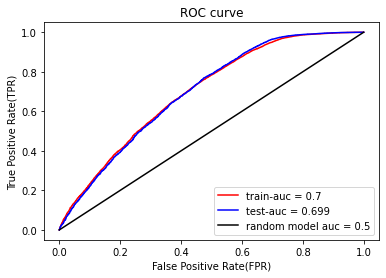

Best AUC for the model is 0.699 


In [38]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [39]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8572
Test Accuracy score for this model :  0.8605


In [43]:
print("MAE = {:5.4f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("MSE = {:5.4f}".format(metrics.mean_squared_error(y_test, predicted)))
print("RMSE = {:5.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

MAE = 0.1395
MSE = 0.1395
RMSE = 0.3735


# random forest


In [14]:
#using random forest model
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   21.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [15]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


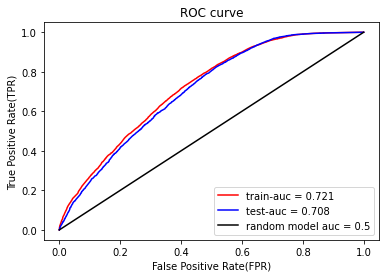

Best AUC for the model is 0.708 


In [16]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [17]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8247
Test Accuracy score for this model :  0.8215


In [18]:
predicted = clf.predict(X_test_vec)

In [57]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.18023529411764705
Mean Squared Error: 0.18023529411764705
Root Mean Squared Error: 0.424541274928183


# decision tree

In [20]:
conda install -c fastai -c pytorch -c anaconda fastai gh anaconda

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - anaconda
    - fastai
    - gh


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.10  |           py37_0           5 KB  anaconda
    anaconda-custom            |           py37_1           3 KB  anaconda
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    catalogue-1.0.0            |           py37_1          15 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    cymem-2.0.3                |   py37hb1e8313_0          34 KB  anaconda
    cython-blis-0.4.1          |   py37haf1e3a3_1         3.1 

In [78]:
import fastai
from fastai import *
from fastai.tabular.all import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('preprocessed_data.csv')
data

,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_name_length,product_description_length,...,delivery_days,estimated_days,ships_in,arrival_time,delivery_impression,estimated_del_impression,ship_impression,seller_popularity,existing_cust,Score
0,1,credit_card,1,18.12,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
1,3,voucher,1,2.00,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
2,2,voucher,1,18.59,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
3,1,credit_card,3,179.12,vianopolis,GO,159.90,19.22,46.0,232.0,...,9,27,5,Early/OnTime,Fast,Slow,Fast,1178,0,1.0
4,1,credit_card,1,72.20,sao goncalo do amarante,RN,45.00,27.20,59.0,468.0,...,14,27,5,Early/OnTime,Fast,Slow,Fast,162,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103025,1,credit_card,3,195.00,praia grande,SP,174.90,20.10,52.0,828.0,...,22,24,6,Early/OnTime,Neutral,Neutral,Fast,79,0,1.0
103026,1,credit_card,5,271.01,nova vicosa,BA,205.99,65.02,51.0,500.0,...,25,31,9,Early/OnTime,Slow,Slow,Neutral,72,0,1.0
103027,1,credit_card,4,441.16,japuiba,RJ,179.99,40.59,59.0,1893.0,...,17,38,4,Early/OnTime,Neutral,Slow,Fast,790,1,0.0
103028,1,credit_card,4,441.16,japuiba,RJ,179.99,40.59,59.0,1893.0,...,17,38,4,Early/OnTime,Neutral,Slow,Fast,790,1,0.0


In [59]:
dep_var='Score'
cont,cat = cont_cat_split(data, 1, dep_var=dep_var)
procs = [Categorify, FillMissing]
splits = RandomSplitter(valid_pct=0.2)(range_of(data))
to = TabularPandas(data, procs, cat, cont, y_names=dep_var, splits=splits)
X_train, y_train = to.train.xs,to.train.y
X_valid, y_valid = to.valid.xs,to.valid.y

In [74]:
n_estimators = [100,200]
max_depth = [None,4,5]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
}
m =  RandomForestClassifier()
m_random = RandomizedSearchCV(estimator = m, 
                              param_distributions = grid, 
                              n_iter = 20, 
                              cv = 3, 
                              verbose=2, 
                              random_state=1, 
                              scoring='accuracy',
                              n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


{'n_estimators': 200, 'max_depth': None}

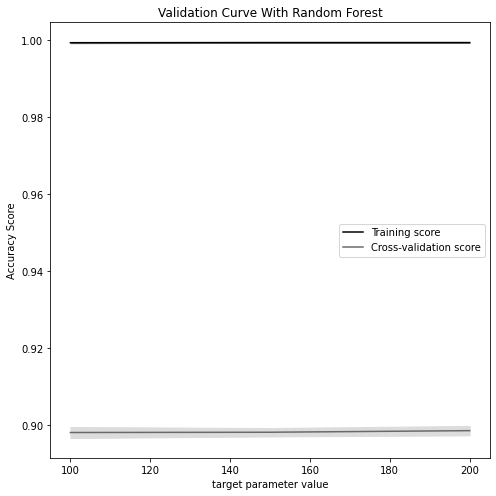

In [75]:
from sklearn.model_selection import validation_curve
param_range =  [100,150,200]
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = "n_estimators", 
                                scoring = "accuracy",
                                param_range =  param_range, cv = 3,n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve With Random Forest")
plt.xlabel("target parameter value")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [62]:
best_random = m_random.best_estimator_
y_pred = best_random.predict(X_valid)

In [63]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_valid, y_pred)**(1/2) # RMSE

0.3004412897290369

In [71]:
accuracy_score(y_valid, y_pred)

0.9097350286324372

In [87]:
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10,15,20], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 100, 300, 500, 100

In [88]:
DT.best_params_

{'max_depth': 20, 'min_samples_split': 300}

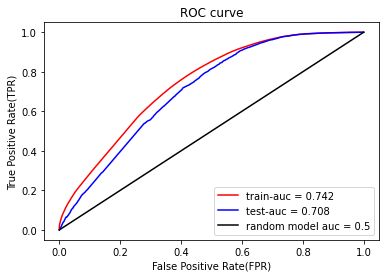

Best AUC for the model is 0.708 


In [89]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [90]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7468
Test Accuracy score for this model :  0.7331


In [91]:
predicted = clf.predict(X_test_vec)

In [92]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.26685294117647057
Mean Squared Error: 0.26685294117647057
Root Mean Squared Error: 0.5165781075272844


# GBDT model

In [19]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(RFclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [20]:
clf.best_params_

{'max_depth': 8, 'min_samples_split': 10}

In [21]:
import pickle

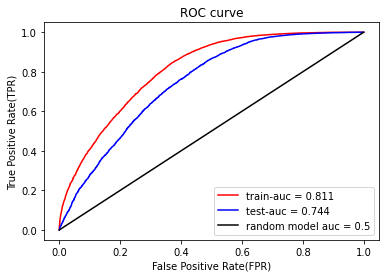

Best AUC for the model is 0.744 


In [22]:
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [23]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.874
Test Accuracy score for this model :  0.8649


In [24]:
predicted = clf.predict(X_test_vec)

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.13505882352941176
Mean Squared Error: 0.13505882352941176
Root Mean Squared Error: 0.3675035013838804


In [ ]:
I used three models to train the review score. Train Accuracy score for logistic regression model :  0.7468
train accuracy score for decision tree is 0.7468
train accuracy score for random forest 0.8323
Overall we believe thta the random forest model has the highest accuracy score and this should be the model
we choose the predict the review score.

In [98]:
 pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [26]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "RMSE"," Train Accuracy ","Test Accuracy"]

table.add_row([ "Random Forest",'0.424','0.8291','0.8271'])
table.add_row(["Logistic Regression",'0.3735','0.8572','0.8605'])
table.add_row(["Decision Tree",'0.516578','0.7468','0.7331'])
table.add_row(["GBDT",'0.367503',' 0.874','0.8649'])

In [27]:
print(table)

+---------------------+----------+------------------+---------------+
|        Model        |   RMSE   |  Train Accuracy  | Test Accuracy |
+---------------------+----------+------------------+---------------+
|    Random Forest    |  0.424   |      0.8291      |     0.8271    |
| Logistic Regression |  0.3735  |      0.8572      |     0.8605    |
|    Decision Tree    | 0.516578 |      0.7468      |     0.7331    |
|         GBDT        | 0.367503 |       0.874      |     0.8649    |
+---------------------+----------+------------------+---------------+
